In [1]:
from Models.Charts import Charts
from Models.Enunciados import Enunciados

In [2]:
file = 'datos/avocado.csv'
chart = Charts(file)
enun = Enunciados()
chart.formatDate('Date')
df = chart.df #Complete regions
# FILTRO DE REGIONES
chart.topRegions(num=11,exclude="TotalUS")
chart.clearData('Unnamed: 0')
df_top10 = chart.df
df_top10

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


1.1 | **Descomposición de Series Temporales de Precios:** 
   
**Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


**1.1 Explicación:**
 ** He agrupado por fecha y calculado el promedio de AveragePrice para cada fecha. Luego he descompuesto la serie temporal en componentes de tendencia, estacionalidad y residuos. 

La tendencia muestra la evolución general de los precios a lo largo del tiempo, la estacionalidad refleja patrones recurrentes en los precios y los residuos representan la variabilidad no explicada por la tendencia y la estacionalidad. 

Este análisis ayuda a identificar patrones y tendencias en los precios de los aguacates, lo que puede ser útil para predecir futuros precios o entender la dinámica del mercado.

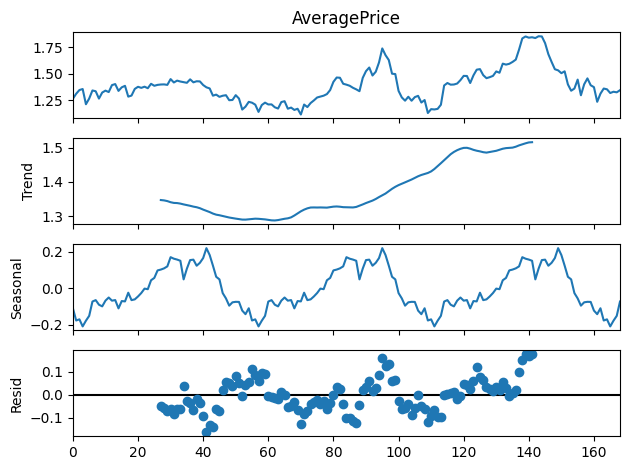

In [3]:
enun.getEnunciado("1.1")
df_group = df_top10.groupby('Date')['AveragePrice'].mean().reset_index()
descompose = chart.seasonal_decompose(df_group['AveragePrice'],model='additive', period=54)
descompose.plot()
enun.getExplicacion("1.1")

1.2 | **Análisis de Estacionalidad por Región:** 
   
**Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


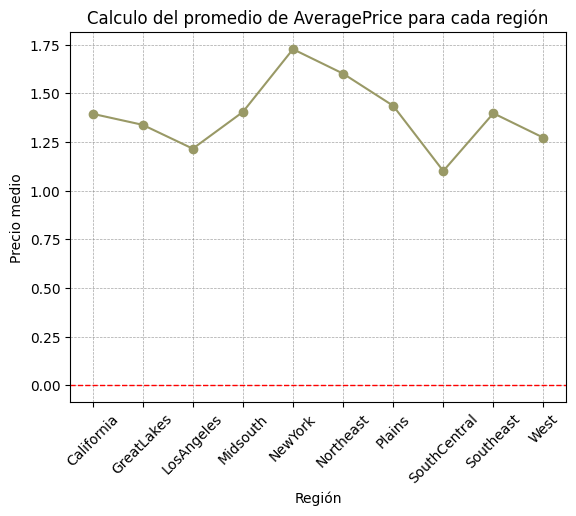

**1.2 Explicación:**
 - **Cada línea representa una región específica y permite observar las tendencias estacionales en los precios. 
 - **Por ejemplo, se pueden identificar picos o caídas en precios en ciertas épocas, lo que refleja la oferta y demanda.

In [4]:
enun.getEnunciado("1.2")
df_g = df_top10[['Date','Total Volume','region','AveragePrice']]
promedio = df_g.groupby('region')['AveragePrice'].mean().reset_index()
chart.plot(promedio['region'],promedio['AveragePrice'],
           title="Calculo del promedio de AveragePrice para cada región",
           xlabel="Región",ylabel="Precio medio")
chart.close()
enun.getExplicacion("1.2")

1.3 | **Comparación de Precios Promedio Mensuales:** 
   
**Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


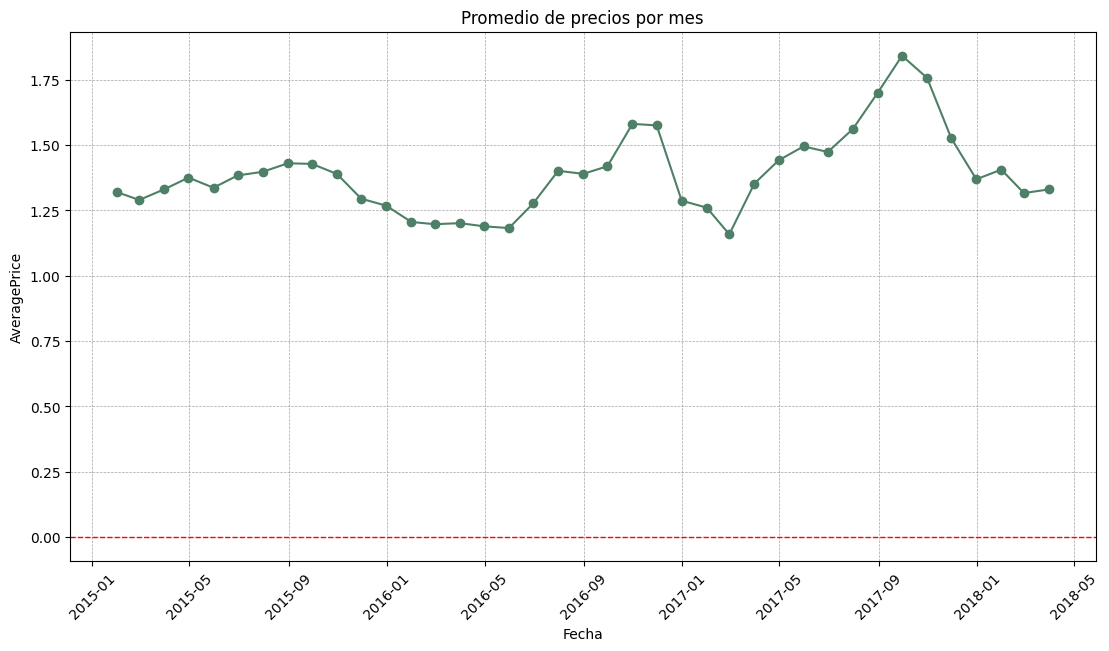

**1.3 Explicación:**
 **Grafica agrupada por mes usando Grouper que te da la opcion de agrupar por el mes, el año, el dia, etc.** 
**Calcula el promedio de AveragePrice para cada mes con mean()** 
**Visualiza los resultados con un gráfico de líneas usando plt.plot()**

In [5]:
enun.getEnunciado("1.3")
df_group1_3 = df_top10.copy()
chart.formatDate('Date')
df_group1_3 = df_group1_3.groupby(chart.pd.Grouper(key="Date",freq="ME"))['AveragePrice'].mean().reset_index()
chart.figureConfig(11,6)
chart.plot(df_group1_3['Date'],df_group1_3['AveragePrice'],title="Promedio de precios por mes",xlabel="Fecha",ylabel="AveragePrice")
chart.close()
enun.getExplicacion("1.3")

1.4 | **Tendencia de Ventas a lo Largo del Tiempo:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


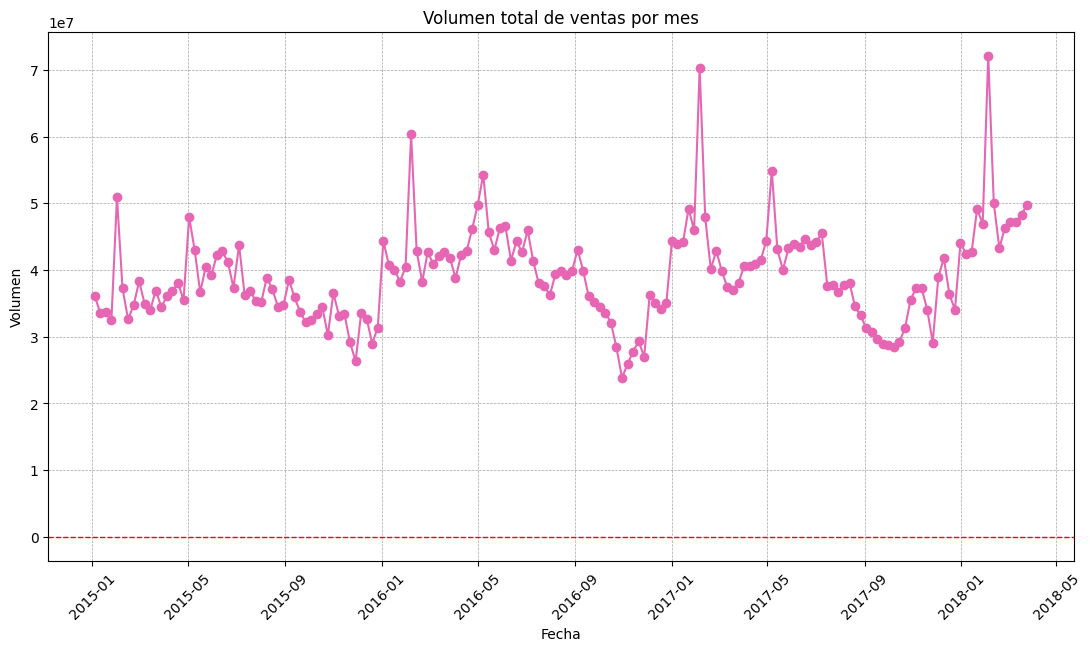

**1.4 Explicación:**
 

In [6]:
enun.getEnunciado("1.4")
df_group1_4 = df_top10.copy()
df_tot_ventas = df_group1_4.groupby('Date')['Total Volume'].sum().reset_index()
chart.figureConfig(11,6)
chart.plot(df_tot_ventas['Date'],df_tot_ventas['Total Volume'],title="Volumen total de ventas por mes",xlabel="Fecha",ylabel="Volumen")
chart.close()
enun.getExplicacion("1.4")

1.5 | **Análisis de Cambios en Precios Anuales:** 
   
**Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


   year  AveragePrice
0  2015      1.353663
1  2016      1.327144
2  2017      1.493585
3  2018      1.351250


**1.5 Explicación:**
 - He quitado el año 2018 ya que no tenemos el año completo y no seria una evaluación real de los datos.** 
- He agrupado los datos por año y calculado el promedio de AveragePrice para cada año. 
 - He representado los resultados en un gráfico de barras para comparar los precios de cada año. -- Vemos un incremento del precio medio de los aguacates en 2017 respecto a 2015 y 2016. 
 - Añadiendo la linea plt.xticks convertirmos los años en enteros evitando que se muestren en notación científica.

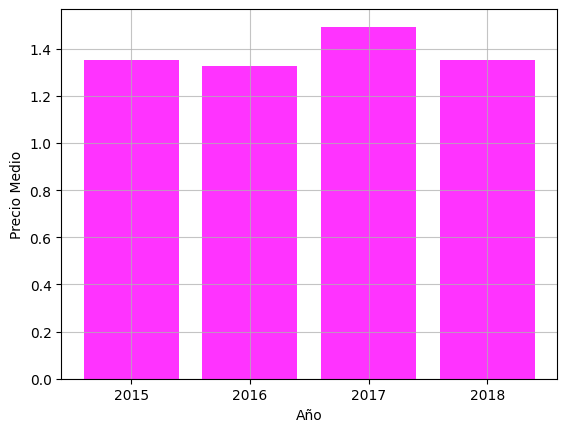

In [7]:
enun.getEnunciado("1.5")
df_group1_5 = df_top10.copy()

promedio = df_group1_5.groupby(['year'])['AveragePrice'].mean().reset_index()
chart.filterByRangeYear(2015,2017,promedio)
# promedio = promedio[(promedio['year'] >= 2015) & (promedio['year'] <= 2017)]
print(promedio)
chart.plot_bar(promedio['year'],promedio['AveragePrice'],title="Promedio de precios por año",xlabel="Año",ylabel="Precio Medio",show=False)
chart.plt.xticks(promedio['year'], promedio['year'].astype(int))
enun.getExplicacion("1.5")

2.1 | **Gráfico de Violín de Volumen de Ventas por Región:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.


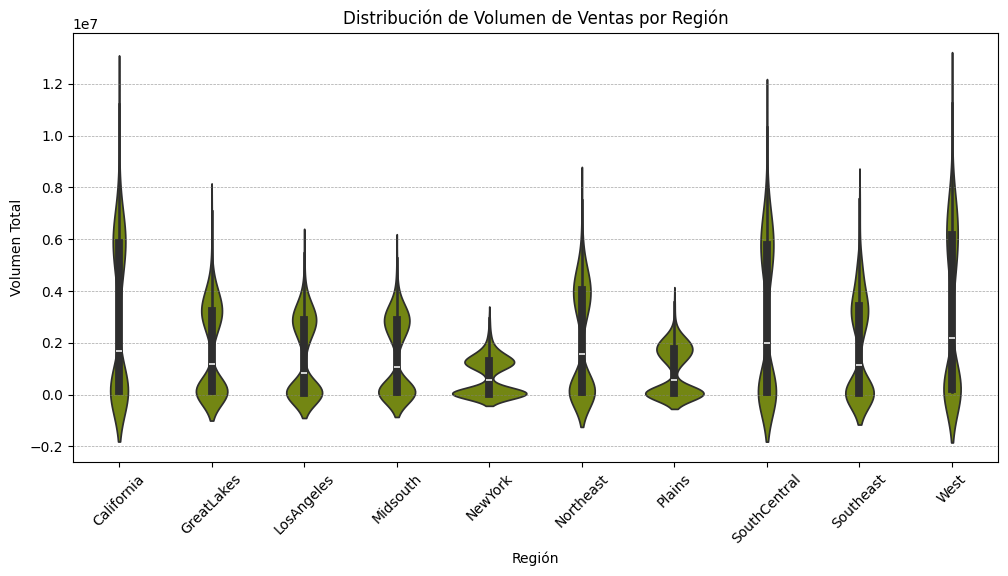

**2.1 Explicación:**
 - Cada violín indica **la densidad de la distribución** del volumen de ventas de cada región.
 - La forma y el ancho del violín a lo largo del eje Y representan cuántas observaciones están dentro de ese rango de Total Volume para la región dada. Un violín más ancho en un área específica significa más datos en ese rango de ventas. 
 - En cada violín puedes ver una línea central que marca la mediana, y a veces otras líneas para los cuartiles, dependiendo de la configuración predeterminada.

In [8]:
enun.getEnunciado("2.1")
df_group2_1 = df_top10.copy()
df_group2_1 = df_group2_1[['Total Volume','region']]
chart.figureConfig(10,5)
chart.sns.violinplot(x='region', y='Total Volume', data=df_group2_1,color=chart.getColor())
chart.plt.title("Distribución de Volumen de Ventas por Región")
chart.plt.xlabel("Región")
chart.plt.ylabel("Volumen Total")
chart.plt.show()
enun.getExplicacion("2.1")

2.2 | **Boxplot Comparativo de Precios entre Años:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.


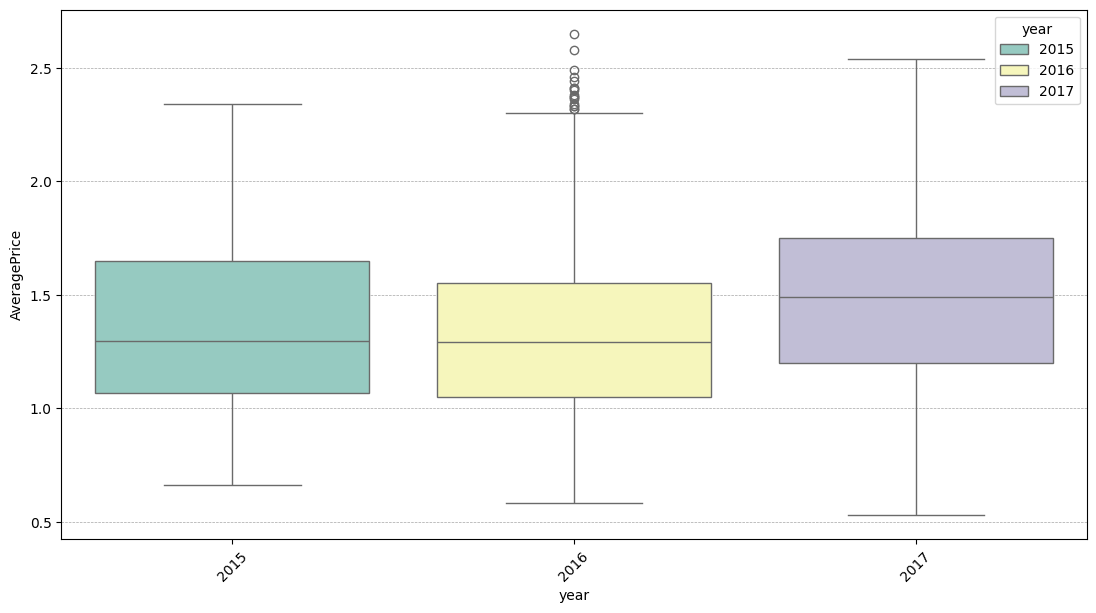

**2.2 Explicación:**
 

In [9]:
enun.getEnunciado("2.2")
df_group2_2 = df_top10.copy()
df_group2_2 = df_group2_2[['AveragePrice','year']]
df_group2_2 = df_group2_2[(df_group2_2['year'] >= 2015) & (df_group2_2['year'] <= 2017)]
chart.figureConfig(11,6)
chart.sns.boxplot(x='year',y='AveragePrice',data=df_group2_2,color=chart.getColor(),palette="Set3", hue='year',)
chart.show()
enun.getExplicacion("2.2")

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


**2.3 Explicación:**
 **bins**  
**int o secuencia, predeterminado 10**  
Número de *bins* (intervalos) para el histograma. Si se proporciona un número entero, se calculan y devuelven los bordes de los bins como `bins + 1`. Si se proporciona una secuencia, se especifican los bordes de los bins, incluyendo el borde izquierdo del primer bin y el borde derecho del último bin. En este caso, se devuelve `bins` sin modificar.

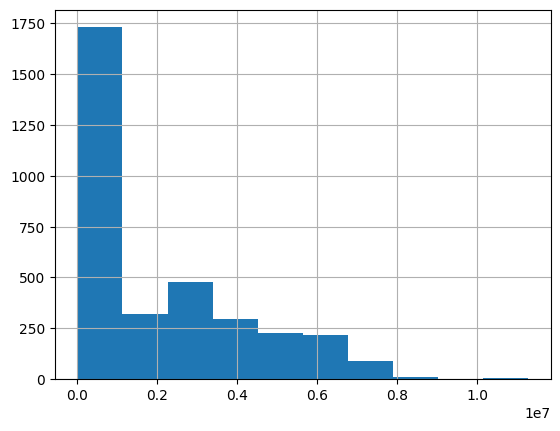

In [10]:
enun.getEnunciado("2.3")
df_group2_3 = df_top10.copy()
df_group2_3['Total Volume'].hist()
enun.getExplicacion("2.3")

2.4 | **Gráfico de Barras de Ventas por Tipo de Bolsa:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


**2.4 Explicación:**
 

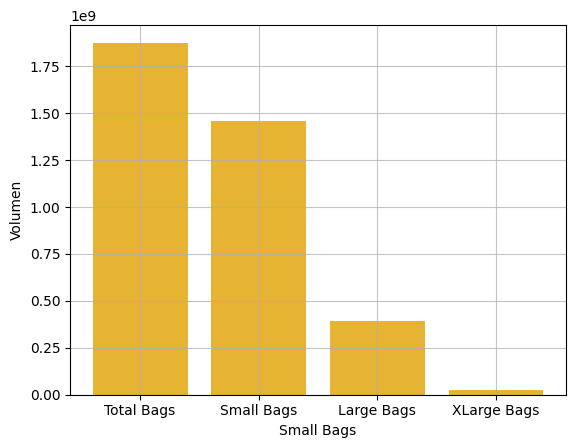

In [11]:
enun.getEnunciado("2.4")
df_group2_4 = df_top10.copy()
df_group2_4 = df_group2_4[['Total Bags','Small Bags','Large Bags','XLarge Bags']].sum()
chart.plot_bar(x=df_group2_4.index,y=df_group2_4.values,title="Volumen de ventas",xlabel="Small Bags",ylabel="Volumen",show=False)
enun.getExplicacion("2.4")

2.5 | **Gráfico de Líneas de Precios Promedios por Año:** 
   
- **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


   year  AveragePrice
0  2015      1.353663
1  2016      1.327144
2  2017      1.493585


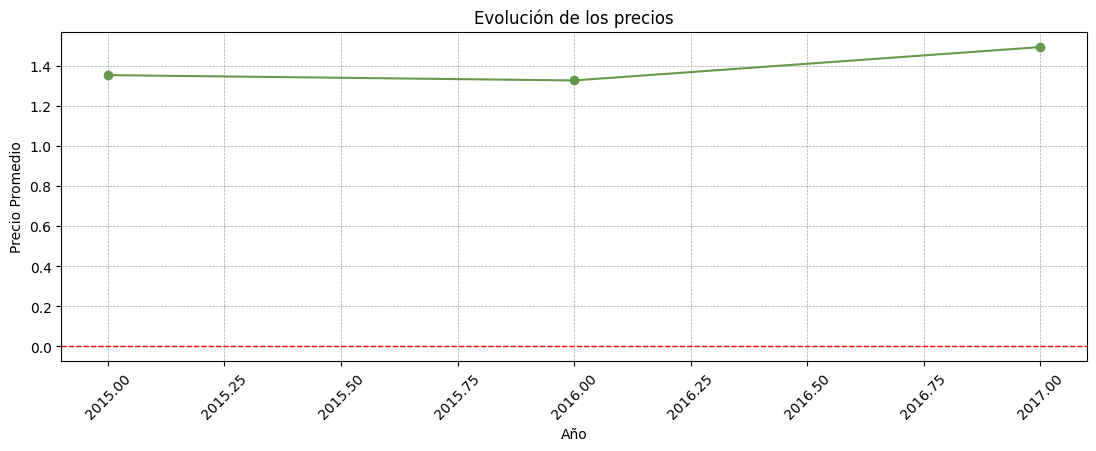

**2.5 Explicación:**
 

In [12]:
enun.getEnunciado("2.5")
df_group2_5 = df_top10.copy()
df_group2_5 = df_group2_5.groupby('year')['AveragePrice'].mean().reset_index()
df_group2_5 = chart.filterByRangeYear(2015,2017,df_group2_5)
print(df_group2_5)
df_group2_5['year'] = df_group2_5['year'].astype(int)
chart.figureConfig(11,4)
chart.plot(df_group2_5['year'],df_group2_5['AveragePrice'],title="Evolución de los precios",xlabel="Año",ylabel="Precio Promedio")
enun.getExplicacion("2.5")

3.1 | **Elasticidad Precio-Demanda por Año:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
  - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.


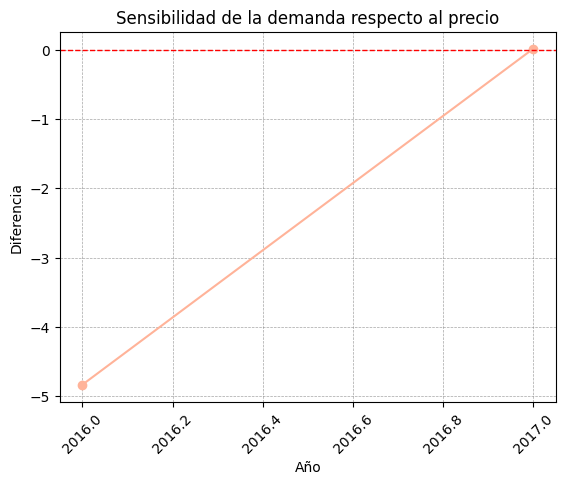

**3.1 Explicación:**
 - **Cálculos de variación porcentual:** - Usamos .pct_change() para calcular la variación porcentual en Total Volume y AveragePrice de un año a otro.
 - **Elasticidad:** - Se calcula la elasticidad como la razón de la variación porcentual del volumen sobre la variación porcentual del precio.
 - **Filtrado** de los datos: Se filtran los datos entre 2014 y 2017 usando chart.filterByRangeYear (asumí que esta función está correctamente definida en tu código).
 - **Gráfico de líneas:** - Usamos plt.plot() para trazar la elasticidad a lo largo de los años y añadir etiquetas y una leyenda.

In [13]:
enun.getEnunciado("3.1")
df_group3_1 = df_top10.copy()
df_group3_1['year'] = df_group3_1['year'].astype(int)

df_group3_1 = df_group3_1.groupby('year').agg({
    'Total Volume': 'mean',
    'AveragePrice': 'mean'
}).reset_index()

df_group3_1 = chart.filterByRangeYear(2014,2017,df_group3_1)
# Calcular la variación porcentual para Total Volume y AveragePrice
df_group3_1['Var_TotalVolume'] = df_group3_1['Total Volume'].pct_change()
df_group3_1['Var_AveragePrice'] = df_group3_1['AveragePrice'].pct_change()

# Elasticidad 
df_group3_1['elasticity'] = df_group3_1['Var_TotalVolume'] / df_group3_1['Var_AveragePrice'] 

df_group3_1  = df_group3_1.dropna()

chart.plot(df_group3_1['year'],df_group3_1['elasticity'],title="Sensibilidad de la demanda respecto al precio",xlabel="Año",ylabel="Diferencia",show=True)

enun.getExplicacion("3.1")

3.2 | **Comparación de Elasticidad en Diferentes Mercados:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.


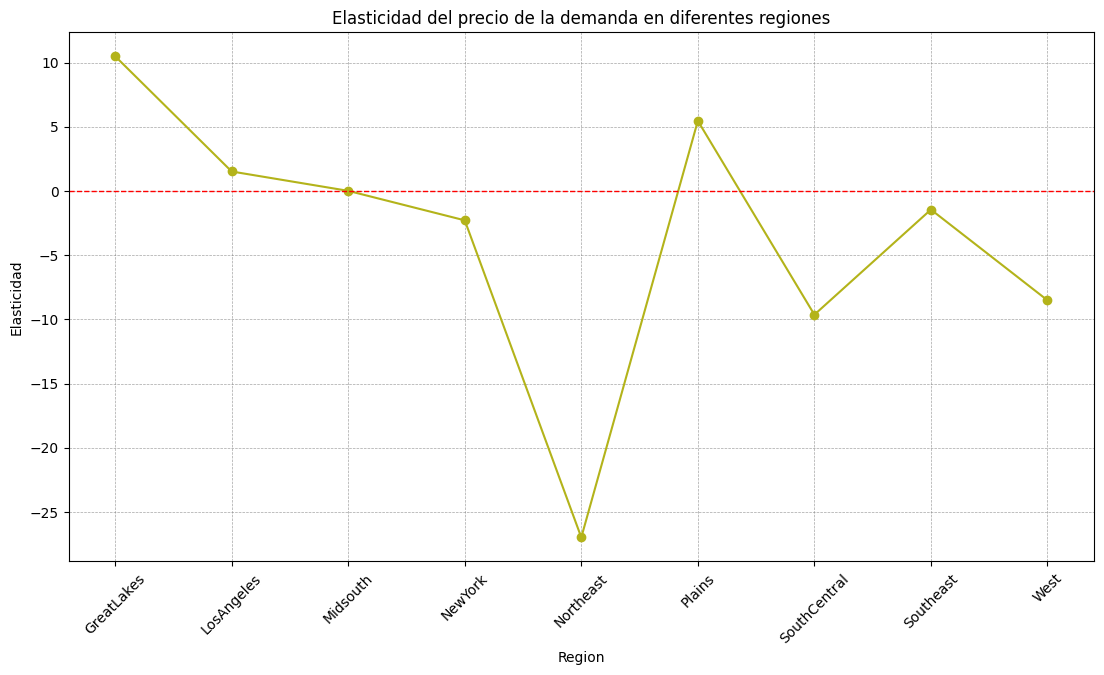

**3.2 Explicación:**
 

In [14]:
enun.getEnunciado("3.2")
df_group3_2 = df_top10.copy()
df_group3_2 = df_group3_2.groupby('region').agg({
    'Total Volume':'sum',
    'AveragePrice':'mean'
}).reset_index()

df_group3_2['Pct_Total_Volume'] = df_group3_2['Total Volume'].pct_change()
df_group3_2['Pct_Average_Price'] = df_group3_2['AveragePrice'].pct_change()
df_group3_2['elasticity'] = (df_group3_2['Pct_Total_Volume'] / df_group3_2['Pct_Average_Price']).dropna()
chart.figureConfig(11,6)
chart.plot(df_group3_2['region'],df_group3_2['elasticity'],title="Elasticidad del precio de la demanda en diferentes regiones",xlabel="Region",ylabel="Elasticidad")
enun.getExplicacion("3.2")

3.3 | **Elasticidad a Nivel de Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.


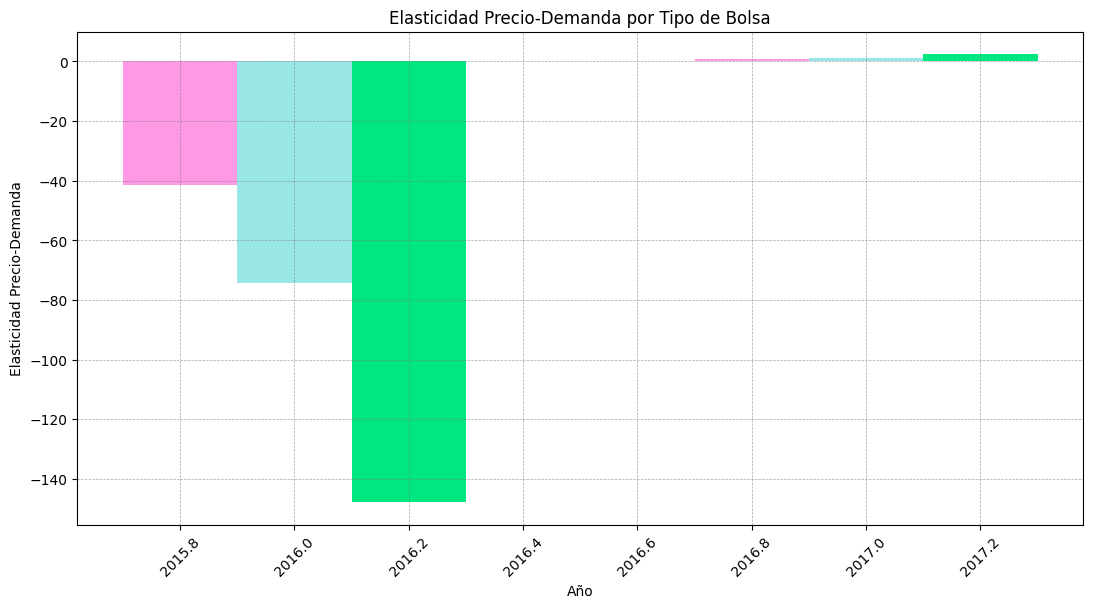

**3.3 Explicación:**
 
 El valor -0.2 ajusta la posición de las barras en el eje X. Esto es especialmente útil cuando quieres mostrar varias barras agrupadas por año (o cualquier otra categoría en el eje X) y evitar que se superpongan. 
 - df_group3_3['year'] - 0.2 para una barra,
 - df_group3_3['year'] para otra,
 - df_group3_3['year'] + 0.2 para la siguiente, y así sucesivamente.
 **Comentarios:**
 - a) Para calcular la elasticidad del precio de la demanda específica de cada tipo de bolsa (Small Bags, Large Bags, XLarge Bags) 
  en base al archivo CSV adjunto, haremos lo siguiente:
 - b) Agruparemos y sumaremos los volúmenes de ventas por cada tipo de bolsa.
 - c) Calcularemos la variación porcentual de AveragePrice y de cada tipo de bolsa por año usando pct_change.
 - d) Calcularemos la elasticidad para cada tipo de bolsa dividiendo la variación porcentual de ventas por la variación porcentual del precio.
 e) Visualizaremos los resultados en un gráfico de barras para comparar las elasticidades entre los tipos de bolsa.

In [15]:
enun.getEnunciado("3.3")
df_group3_3 = df_top10.copy()

# CALCULO DE LA ELASTICIDAD PARA LAS SMALL BAGS

df_group3_3 = df_group3_3.groupby('year').agg(
    {
        'AveragePrice': 'mean',
        'Small Bags': 'sum',
        'Large Bags': 'sum',
        'XLarge Bags': 'sum'
    }
).reset_index()
df_group3_3 = chart.filterByRangeYear(2015,2017,df_group3_3)
# Calcular el cambio porcentual anual para cada tipo de bolsa y el precio promedio
df_group3_3['pct_change_price'] = df_group3_3['AveragePrice'].pct_change()
df_group3_3['pct_change_small'] = df_group3_3['Small Bags'].pct_change()
df_group3_3['pct_change_large'] = df_group3_3['Large Bags'].pct_change()
df_group3_3['pct_change_xlarge'] = df_group3_3['XLarge Bags'].pct_change()

# Calcular la elasticidad para cada tipo de bolsa
df_group3_3['elasticity_small'] = (df_group3_3['pct_change_small'] / df_group3_3['pct_change_price']).dropna()
df_group3_3['elasticity_large'] = (df_group3_3['pct_change_large'] / df_group3_3['pct_change_price']).dropna()
df_group3_3['elasticity_xlarge'] = (df_group3_3['pct_change_xlarge'] / df_group3_3['pct_change_price']).dropna()

chart.figureConfig(title="Elasticidad Precio-Demanda por Tipo de Bolsa",xlabel="Año",ylabel="Elasticidad Precio-Demanda")

chart.plt.bar(df_group3_3['year'] - 0.2, df_group3_3['elasticity_small'], width=0.2, label='Small Bags',color=chart.getColor())
chart.plt.bar(df_group3_3['year'], df_group3_3['elasticity_large'], width=0.2, label='Large Bags',color=chart.getColor())
chart.plt.bar(df_group3_3['year'] + 0.2, df_group3_3['elasticity_xlarge'], width=0.2, label='XLarge Bags',color=chart.getColor())

# Configuración del gráfico
chart.plt.grid(axis='y', linestyle='--', alpha=0.7)
chart.plt.show()

enun.getExplicacion("3.3")

3.4 | **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.


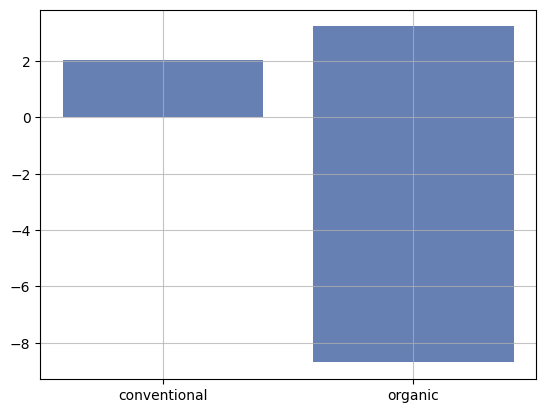

**3.4 Explicación:**
 

In [16]:
enun.getEnunciado("3.4")
df_group3_4 = df_top10.copy()
df_group3_4 = df_group3_4.groupby(['type','year']).agg({
    'AveragePrice':'mean',
    'Total Volume':'sum'
}).reset_index()

df_group3_4 = chart.filterByRangeYear(2015,2017,df_group3_4)
df_group3_4['pct_volume'] = df_group3_4['Total Volume'].pct_change()
df_group3_4['pct_avg'] = df_group3_4['AveragePrice'].pct_change()
df_group3_4['elascitity'] = (df_group3_4['pct_volume'] / df_group3_4['pct_avg']).fillna(0)

chart.plot_bar(df_group3_4['type'],df_group3_4['elascitity'],title="",xlabel="",ylabel="")
enun.getExplicacion("3.4")

3.5 | **Análisis de la Elasticidad Precios-Ventas:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.


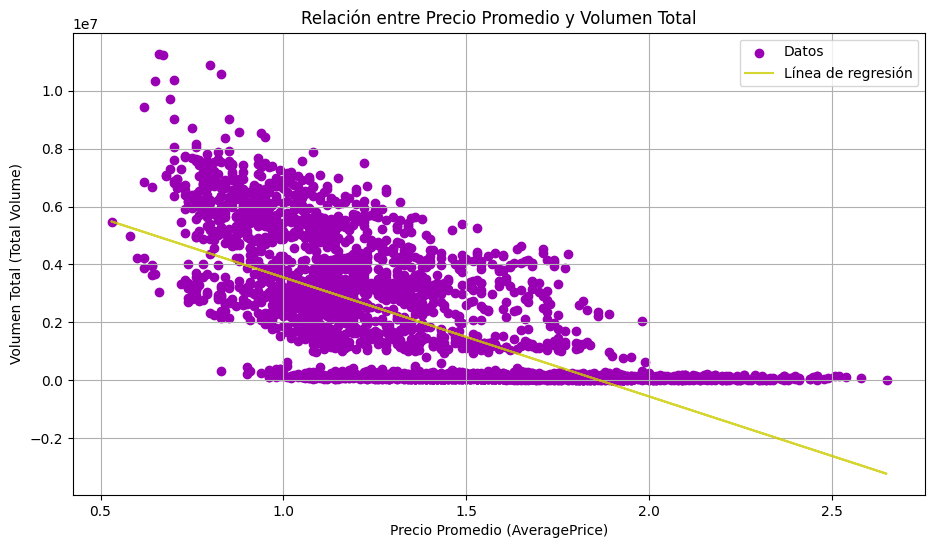

Elasticidad (coeficiente de la regresión): -4106860.204077794


**3.5 Explicación:**
  Refleja un valor constante de 1.0 para todos los años. Esto sugiere que la **elasticidad es uniforme** en todos los años y está fijada en 1.0, lo que implica que el cambio porcentual en el volumen de ventas es exactamente proporcional al cambio porcentual en el precio promedio (es decir, un cambio del 1% en el precio se refleja en un cambio del 1% en el volumen de ventas).

In [17]:
enun.getEnunciado("3.5")
df_group3_5 = df_top10.copy()

# Definir X (variables independientes) y y (variable dependiente)
X = df_group3_5[['AveragePrice']]  # Tomamos AveragePrice como predictor
y = df_group3_5['Total Volume']    # Total Volume es la respuesta

# Crear y entrenar el modelo
model = chart.linear_regression()
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Calcular la elasticidad (aproximadamente el coeficiente de la regresión)
elasticity = model.coef_[0]  # Coeficiente de la pendiente

chart.plt.figure(figsize=(11,6))
# Visualización: Gráfico de dispersión y línea de regresión
chart.plt.scatter(X, y, color=chart.getColor(), label='Datos')
chart.plt.plot(X, y_pred ,color=chart.getColor(), label='Línea de regresión',alpha=0.8)
chart.plt.xlabel('Precio Promedio (AveragePrice)')
chart.plt.ylabel('Volumen Total (Total Volume)')
chart.plt.title('Relación entre Precio Promedio y Volumen Total')
chart.plt.grid(True)
chart.plt.legend()
chart.plt.show()

# Imprimir el valor de la elasticidad (coeficiente de la regresión)
print(f'Elasticidad (coeficiente de la regresión): {elasticity}')

enun.getExplicacion("3.5")

4.1 | **Cohortes Basadas en Precios Promedios Trimestrales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.


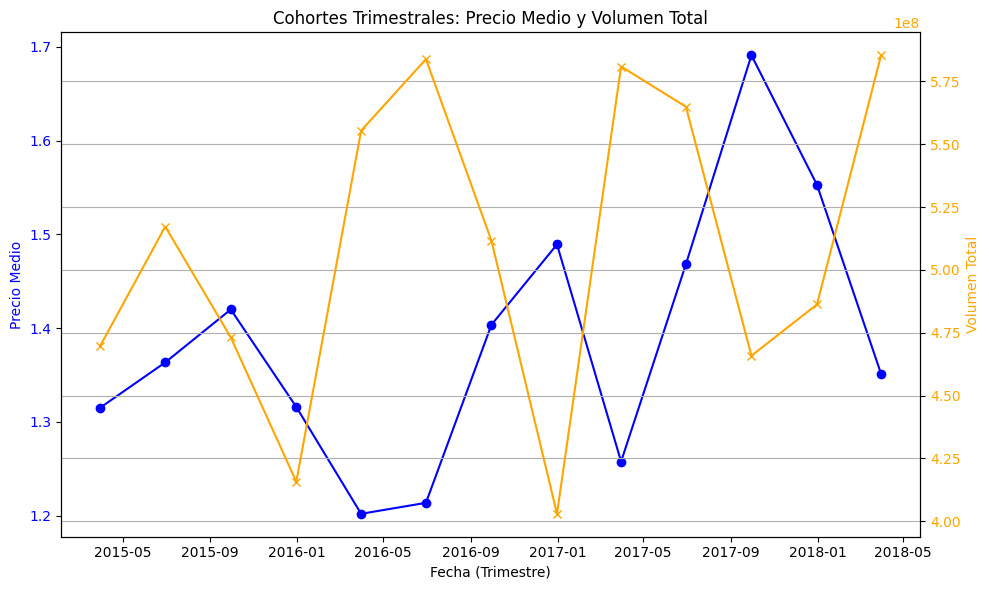

**4.1 Explicación:**
 

In [18]:
enun.getEnunciado("4.1")
df_group4_1 = df_top10.copy()

# Selección de columnas y agrupación trimestral
df_group4_1 = df_group4_1[['AveragePrice', 'Date', 'Total Volume']].fillna(0)

# Rellenar valores nulos en 'Total Volume' usando 'deleted_account_id' (clientes␣

df_group4_1.fillna({"AveragePrice": df_group4_1["Total Volume"]}, inplace=True)
df_group4_1 = df_group4_1.groupby(chart.pd.Grouper(key='Date', freq="QE")).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Crear tabla pivote para el análisis de cohortes
cohorte = df_group4_1.pivot_table(
    index='Date',                # Índice por trimestre
    values='AveragePrice',        # Promedio de precios
    columns='Total Volume',       # Volumen total
    aggfunc='sum'
)

# Configuración de la gráfica
fig, ax1 = chart.plt.subplots(figsize=(10, 6))

# Primer eje para el precio promedio
ax1.plot(df_group4_1['Date'], df_group4_1['AveragePrice'], marker='o', color='b', label='Precio Medio Trimestral')
ax1.set_xlabel("Fecha (Trimestre)")
ax1.set_ylabel("Precio Medio", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Segundo eje para el volumen total
ax2 = ax1.twinx()
ax2.plot(df_group4_1['Date'], df_group4_1['Total Volume'], marker='x', color='orange', label='Volumen Total Trimestral')
ax2.set_ylabel("Volumen Total", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
chart.plt.grid(True)
# Título y leyenda
chart.plt.title("Cohortes Trimestrales: Precio Medio y Volumen Total")
fig.tight_layout()
chart.plt.show()

enun.getExplicacion("4.1")

4.2 | **Cohortes por Región y Fecha:** 
   
 - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.


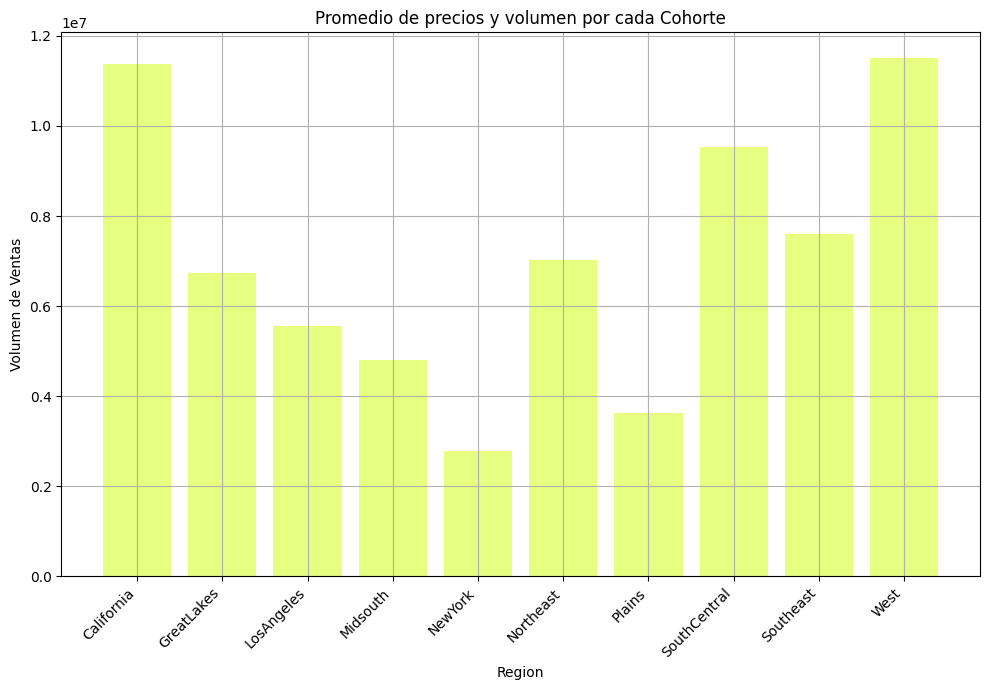

**4.2 Explicación:**
 ** Interpretación del Gráfico** 
 - El gráfico muestra la evolución de AveragePrice y Total Volume para cada región a lo largo del tiempo. 
** Las barras representan el volumen total y las líneas indican el precio promedio en cada trimestre, lo que ayuda a comparar 
** cómo las diferentes regiones responden a cambios en el mercado.

In [19]:
enun.getEnunciado("4.2")
df_group4_2 = df_top10.copy()
df_group4_2['Date'] = chart.pd.to_datetime(df_group4_2['Date'])
df_group4_2 = chart.filterByRangeYear(2015,2017,df_group4_2)
df_group4_2 = df_group4_2.groupby(['region', 'Date']).agg({
    'AveragePrice':'mean',
    'Total Volume':'sum'
}).reset_index()


# Crear el gráfico de barras
fig, ax = chart.plt.subplots(figsize=(10, 7))

ax.bar(df_group4_2['region'], df_group4_2['Total Volume'],color=chart.getColor())


chart.plt.grid(True)
# Título y leyenda
chart.plt.title("Promedio de precios y volumen por cada Cohorte")
chart.plt.xlabel('Region')
chart.plt.ylabel('Volumen de Ventas')
chart.plt.xticks(rotation=45,ha='right')
fig.tight_layout()
chart.plt.show()
enun.getExplicacion("4.2")

In [38]:
enun.getEnunciado("4.3")

# Agrupación correcta y agregación
df_group4_3 = df_group4_3.groupby(['Date', 'Small Bags', 'Large Bags', 'XLarge Bags']).agg(
    total_ventas=('Total Bags', 'sum'),
    ventas_totales=('Total Volume', 'sum')
).reset_index()

# Crear el gráfico de líneas
chart.plt.figure(figsize=(11,6))
chart.plt.plot(df_group4_3['Date'], df_group4_3['total_ventas'], color=chart.getColor())

# Añadir cuadrícula
chart.plt.grid(True)

# Títulos
chart.plt.title("Total Ventas por Fecha y Tipo de Bolsa")
chart.plt.xlabel("Fecha")
chart.plt.ylabel("Total Ventas")

# Mostrar el gráfico
chart.plt.show()

enun.getExplicacion("4.3")

4.3 | **Cohortes por Región y Fecha:** 
   
- **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.


KeyError: "Column(s) ['Total Bags', 'Total Volume'] do not exist"